<a href="https://colab.research.google.com/github/mqquiroz/HUCLAM/blob/main/Tiempo_Vaciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tiempo de vaciado de un tanque a través de un orificio en su parte inferior
## Proyecto HUCLAM 

### Desarrollo Teórico



Dejaremos: 

$A$: Área del tanque (o estanque) \\
$a$: Área del orificio \\
$H_{1}$: Altura Inicial del líquido en el tanque\\
$H_{2}$: Altura final del líquido en el tanque \\

Volumen del líquido dejando el tanque en un tiempo $dt$: 

$$ = A\times dh$$

Velocidad teórica del agua a través del orificio:

$$ U = \sqrt{2gh} $$

Descarga: 

$$ dQ = C_{d}\cdot a \cdot U = C_{d}\cdot a \cdot \sqrt{2gh} $$

Descarga en un tiempo $dt$: 

$$ C_{d}\cdot a \cdot \sqrt{2gh} \cdot dt $$

Entonces, el volumen del líquido dejando el tanque debe ser igual al volumen de líquido fluyendo a través del orificio:

$$ - A\cdot dh = C_{d}\cdot a \cdot \sqrt{2gh} \cdot dt $$

Reordenando y despejando para $dt$: 

$$ dt = \frac{- A\cdot dh}{C_{d}\cdot a \cdot \sqrt{2gh}} = \frac{- A\cdot 
 h^{-1/2}}{C_{d}\cdot a \cdot \sqrt{2g}} dh $$

Se puede encontrar el tiempo total integrando: 

$$ t = \int_{H_{1}}^{H_{2}} dt = \frac{-A}{C_{d}\cdot a \cdot \sqrt{2g}} \int_{H_{1}}^{H_{2}} h^{-1/2} dh $$

Resolviendo: 

$$ t = \frac{-A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[2h^{1/2} \right]_{H_{1}}^{H_{2}}  = \frac{-2A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[H_{2}^{1/2} - H_{1}^{1/2}\right]$$

Luego:

$$ t = \frac{2A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[H_{1}^{1/2} - H_{2}^{1/2}\right] = \frac{2A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[\sqrt{H_{1}} - \sqrt{H_{2}}\right] $$

Si se requiere conocer el tiempo en el que el estanque queda vacío, sólo basta con asumir $H_{2} = 0$, así:

$$ t_{vaciado} = \frac{2A \sqrt{H_{1}}}{C_{d}\cdot a \cdot \sqrt{2g}}$$

Por otro lado, si se conoce el tiempo de vaciado y se requiere calcular las dimensiones del orificio:


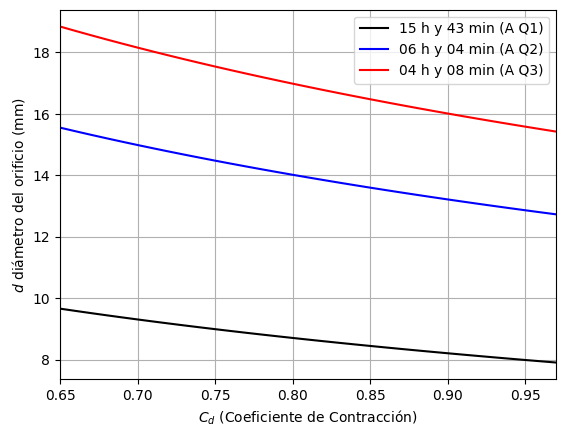

In [69]:
import numpy as np
import matplotlib.pyplot as plt


#datos
A = 2.4*2.4 # Área del tanque (m2)

#D = 1.8   # Diámetro del tanque (m)
H1 = 1.074    # Nivel del estanque (m)
Cd = np.arange(0.65,0.98,0.01) # Coeficiente de

t_v = np.array([943, 364, 248]) # Tiempos de vaciado (min)
t_v = np.array([(15*60)+43 ,(6*60)+4 ,(4*60)+8]) # Tiempos de vaciado (min)
# 15 hrs (900 min) y 43 min
#  6 hrs (360 min) y  4 min
#  4 hrs (240 min) y  8 min 

#Cálculos
g = 9.81 # aceleración de gravedad (m/s2)
#A = np.pi*(D**2)/4
t_v = t_v*60 #(en segundos)

d_ori= np.zeros((len(t_v),len(Cd)))

for i in range(len(t_v)): 
  d_ori[i,:] = np.sqrt(8*A*np.sqrt(H1) / (np.pi*t_v[i]*Cd*np.sqrt(2*g)) )


#print('Los diámetros de los orificios deben ser:', d_ori*1000 ,' (mm)')

plt.plot(Cd,d_ori[0,:]*1000,'k',label='15 h y 43 min (A Q1)')
plt.plot(Cd,d_ori[1,:]*1000,'b',label='06 h y 04 min (A Q2)')
plt.plot(Cd,d_ori[2,:]*1000,'r',label='04 h y 08 min (A Q3)')
plt.xlabel('$C_{d}$ (Coeficiente de Contracción)')
plt.ylabel('$d$ diámetro del orificio (mm)')
plt.grid()
plt.xlim(Cd[0],Cd[-1])
plt.legend()
plt.show()